In [1]:
import numpy as np
from math import pi

import matplotlib.pyplot as plt
import matplotlib.ticker
from matplotlib.ticker import FormatStrFormatter

plt.style.use('vyason')
from collections import OrderedDict
ls_dict = OrderedDict(
            [('solid',     (0, ())),
            ('ldot',      (0, (1, 10))),
            ('dot',       (0, (1, 5))),
            ('ddot',      (0, (1, 1))),
            ('ldash',     (0, (5, 10))),
            ('dash',      (0, (5, 5))),
            ('ddash',     (0, (5, 1))),
            ('ldashdot',  (0, (3, 10, 1, 10))),
            ('dashdot',   (0, (3, 5, 1, 5))),
            ('ddashdot',  (0, (3, 1, 1, 1))),
            ('ldashdot',  (0, (3, 10, 1, 10, 1, 10))),
            ('dashdot',   (0, (3, 5, 1, 5, 1, 5))),
            ('ddashdot',  (0, (3, 1, 1, 1, 1, 1)))])

In [2]:
#radius of sphere with mass m
def calc_R(m,rho):
    return (3*m/(4*pi*rho))**(1/3)

def calc_m(R,rho):
    return rho*4/3*pi*R**3

global hb,c,G,kB,rho

hb = 1.05457182e-34
c = 299792458
G = 6.6743e-11
kB = 1.380649e-23


rho_Os = 22587.2
rho_Si = 2650


R0 = 75e-9      #radius in Markus Aspelmeyer's science paper
m = calc_m(R0,rho_Si)

print(m)


4.682936549257285e-18


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


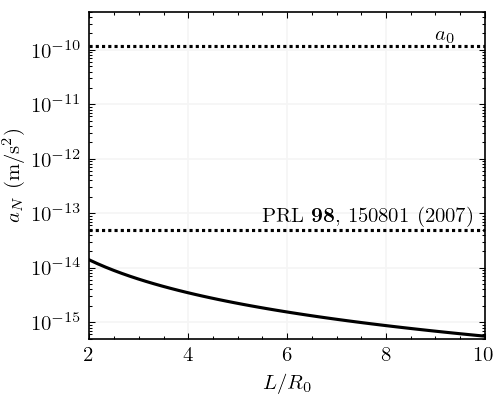

In [4]:
a0 = 1.2e-10        #MOND critical value

#Torsion pendulum limits
#https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.98.150801
a2 = 5e-14      #law of inertia
a1 = 2e-12      #law of gravity


LxR_min,LxR_max=2,10

LxR = np.linspace(LxR_min,LxR_max,endpoint=True)
L = R0*LxR

def_width,def_height = plt.rcParams["figure.figsize"]
def_height = 0.8*def_width

fig = plt.figure(constrained_layout=True,dpi=150)
ax = fig.add_gridspec(1,1).subplots()
fig.set_size_inches(def_width,def_height)

a_Newt = G*m/L**2
#a_MOND = np.sqrt(G*m*a0)/L

ax.plot(LxR,a_Newt,c='black')
#ax.plot(LxR,a_MOND,c='red')

ax.set_xlim(LxR_min,LxR_max)
ax.set_ylim(5e-16,5e-10)
ax.set_xlabel(r'$L/R_0$')
ax.set_ylabel(r'$a_N$ (m/s$^2$)')
ax.grid()

ax.set_yscale('log')

ax.axhline(a0,c='black',ls=ls_dict['ddot'])
#ax.axhline(a1,c='black',ls=ls_dict['ddot'])
ax.axhline(a2,c='black',ls=ls_dict['ddot'])

ax.text(9,1.3*a0,r'$a_0$',c='black')
#ax.text(5.5,1.3*a1,r'CQG \textbf{31}, 195008 (2014)',c='black')
ax.text(5.5,1.4*a2,r'PRL \textbf{98}, 150801 (2007)',c='black')

#ax.fill_between(LxR,a1,a2,color='lightgrey')

ax.legend(bbox_to_anchor=(0.05,0.95),ncol=2)

fig.savefig('accMOND-Aspelmeyer.pdf')